In [102]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline

## Derivates at Work
At work, I'm frequently dealing with decay curves for a movie or TV show. What that means is that after a movie launches on the Netflix service, it gets an initial lift from members that watch the title as soon as we get it on the service. This initial momentum is often heightened by our recommendation algorithms that highlight popular content to other users. At some point, days, weeks or months after the title's debut, this momentum fades and viewerships of the movie begins to decay naturally.
We often look at these decay curves as a way to categorize like titles. Certain types of titles exhibit similar decay curves. 
So, to better understand decay curves, it makes sense to look at the rate of the change of these curves, i.e the slope or first derivative of the curve. This derivative gives us a point of comparison across a number of days, or at a single point in time (e.g. 30 days after launch), of how steeply a title is decaying.

For example, let's assume the following is a time series for a certain movie's streaming performance over its first 120 days on our service. Note that this data is generated so as to not share anything confidential. For purposes of this example, let's assume a movie's viewing pattern follows roughly this exponential decay function:

In [103]:
def decay(x, b):
    return 100*(1-b)**x

Let's look at the first 120 days of a title (n) and set up an array (x) over those days. In addition, let's look at 3 different decay rates (i.e. 3 different types of movies).

In [104]:
n = 120.0
x = np.arange(0,n+1, 1)
decay_rates = [0.02, 0.04, 0.009]

We set up a slope function that uses numpy.gradient to calculate the rate of change for a given function:

In [105]:
def slope(x, b):
    f = decay(x, b)
    s = np.gradient(f, 1)    
    return s

Alternatively, we could implement our own function that calculates the rate of change between two points on a function:

In [106]:
def slope_2(x, b, f, delta):
    delta = float(delta)
    s = (f(x + delta, b) - f(x, b))/delta
    return s

Let's compare the output of the two functions for one day to see if they match:

In [107]:
delta = 0.000001
day = 30

for r in decay_rates:
    print ('(%.3f, %.3f)' % (slope(x, r)[day], slope_2(x, r, decay, delta)[day]))

(-1.102, -1.102)
(-1.200, -1.200)
(-0.689, -0.689)


## Viewer Decay
Next, we'll plot the decay curves, along with tangents at day 30:

In [108]:
def plot_movies(x, f, day, plot_tangent, min_max, version):
    
    """We'll plot a line for each movie, calculate the limit at 
    Day 30 and plot a tangent line at that point 
    
    """
    
    fig = plt.figure(figsize=(12,9))
    
    plt.ylim(min_max)    
    
    for i, r in enumerate(decay_rates):
        
        d = f(x, r)
        point = d[day]
        plt.plot(x, d, label='Movie {0}'.format(i+1), alpha=0.7, zorder=0)
                
        if plot_tangent:
            
            sl = slope(x, r)
            limit = sl[day] 

            tangent_days = x#np.arange(day - 30.0, day + 30, 1)
            tangent_values = point + limit * (tangent_days - day)

            plt.plot(tangent_days, tangent_values, 'k--', linewidth=1)
            plt.annotate('{0:.2f}'.format(limit), xy=(day, point), xytext=(day*1.15, point*1.15),
                        arrowprops=dict(facecolor='black', shrink=0.05, headwidth=5, width=1))

        else:
            plt.annotate('{0:.2f}'.format(point), xy=(day, point), xytext=(day*1.15, point*1.15),
            arrowprops=dict(facecolor='black', shrink=0.05, headwidth=5, width=1))



#     max_xy = plt.gca().get_ylim()
    plt.vlines(day, min_max[0], min_max[1], linestyles='-', colors='k', lw=1, alpha=0.5)
    plt.text(day*1.05, min_max[0], 'Day {:.0f}'.format(day), rotation=0) # add a 1% gap for spacing
    plt.xlabel('Days')
    plt.legend(loc='best')
    plt.title(version)
    plt.show()

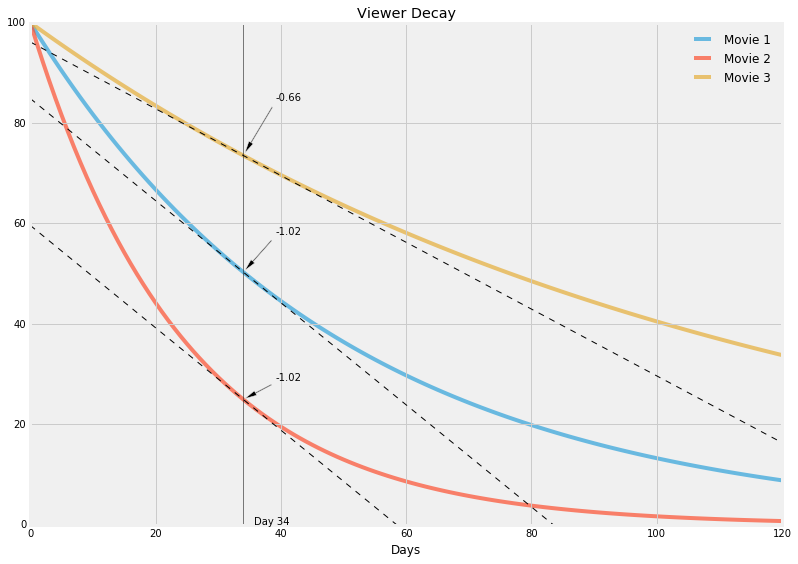

In [109]:
from ipywidgets import interact, interactive, fixed

def interact_plot(day):
    plot_movies(x, decay, day=day, plot_tangent=True, min_max=(0, 100), version='Viewer Decay')
    
interact(interact_plot, day=widgets.IntSlider(min=1,max=100,step=1,value=30))

## Slope of Decay
To graph the slope of the decay over the entire timeframe, we just pass in the slope function to our plotting routine:

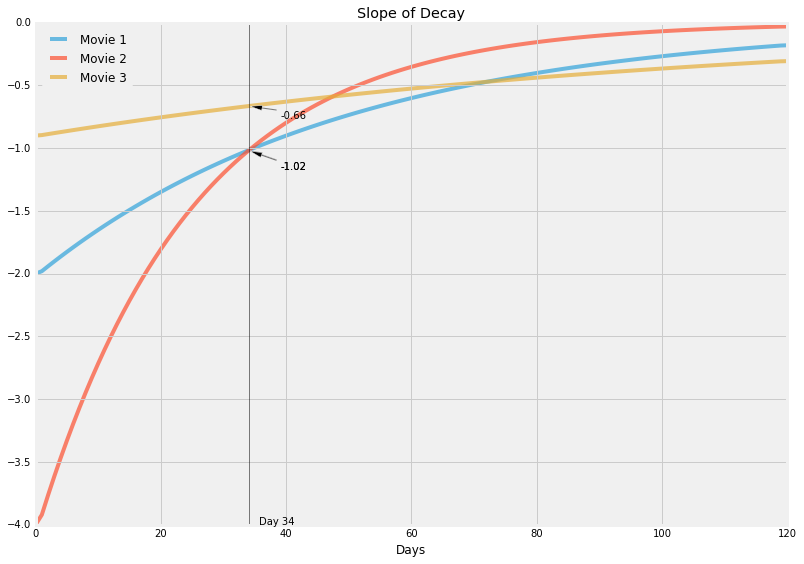

In [111]:
from ipywidgets import interact, interactive, fixed

def interact_plot(day):
    plot_movies(x, slope, day=day, plot_tangent=False, min_max=(-4, 0), version='Slope of Decay')
    
interact(interact_plot, day=widgets.IntSlider(min=1,max=100,step=1,value=30))

So, from the graph and the calculated derivatives, we can deduce that at 30 days after launch, Movie 2 decays at close to the same rate of Movie 1. Most of the decay up to this point came earlier in the title's life, so by day 30, the two movies have fairly similar rates of decay. In fact, only a few days later, the two slope curves in the second graph cross, indicating that after day 30, Movie 2 actually decays at a slower rate than Movie 1.